<a href="https://colab.research.google.com/github/charlieLehman/convexoptimization/blob/master/ECE8823_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.

The last week was spent introducing unconstrained optimization and the most prevelant algorithm for tackling it: iterative direction and steps.  In particular, when the objective is both smooth and convex gradient descent with backtracking is usually what I will try first because it is very simple to implement.  When the objective is at least twice differntiable applying Newton's method can achieve fewer iterations.  The most interesting topics this week were the analysis of bounds and convergence of these methods.  The actual guarantees aside the process for studying how an algorithm behaves given some basic assumptions about the objective is neat and is something that I want to start using in my research.

## 2.

## 3.

## 4. a)

In [1]:
from scipy.misc import derivative
import numpy as np
from matplotlib import pyplot as plt

class GradientDescent(object):
    def __init__(self, f, grad_f, alpha=0.001, beta=0.8):
        self.f = f
        self.alpha = 0.001
        self.beta = 0.8
        self.x = None
        self.k = 0
        self.grad_f = grad_f
        
    def solve(self, x0, max_iter, tol):
        self.x = x0.copy()
        for k in range(max_iter):
            d = -self.grad_f(self.x).T
            _dd = d.T@d
            if _dd <= tol:
                self.k = k
                return self.x
            t = self._backtracking(d, -_dd)
            self.x += t*d
        
    def _backtracking(self, d, _dd):
        t = 1
        c1 = lambda t: self.f(self.x + t*d)
        c2 = lambda t: self.f(self.x) + self.alpha*t*_dd
        cond = c1(t) < c2(t)
        while not cond:
            t *= self.beta
            cond = c1(t) < c2(t)
        return t
                                 
        

## 4. b)

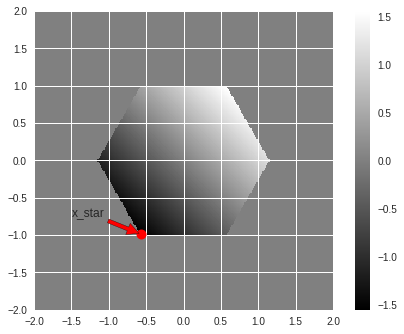

In [2]:
c = np.array([1,1], ndmin=2)
am = np.array([[np.cos(m*np.pi/3), np.sin(m*np.pi/3)] for m in range(1,7)])
l,h = -2,2
num_points = 250
x = y = np.linspace(l,h, num_points) 

xv, yv = np.meshgrid(x, y, indexing='ij')

x_ = np.stack((xv,yv))
mask = np.tensordot(am, x_, axes=[1,0])
mask[mask <= 1] = 1
mask[mask > 1] = 0
mask = mask.prod(0)
z_ = mask*x_.sum(0)
z = z_.reshape(num_points,num_points)
zam = z_.argmin()
xm, ym = zam%num_points, zam//num_points
plt.imshow(z, extent=[l,h,l,h], origin='lower', cmap='gray')
plt.colorbar()
plt.plot(x[xm],y[ym], marker='o', markersize=10, color="red")
plt.annotate('x_star', xy=(x[xm],y[ym]), xytext=(-1.5, -0.75),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()



## 4. c)

At $\tau=1$ the boundary is the log term approaches $-\infty$ and makes the objective approach $\infty$ hence the need to increase $\tau$ to counteract that behavior to allow the unconstrained objective to more closely represent the constrained version.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


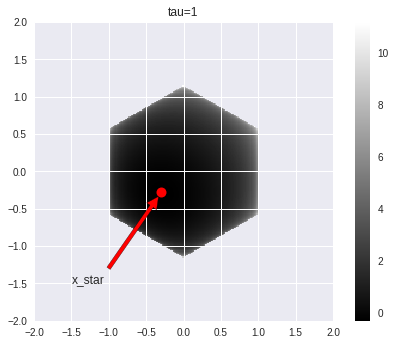

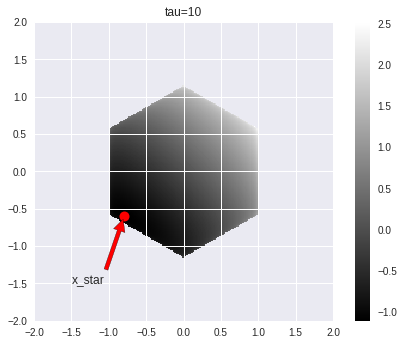

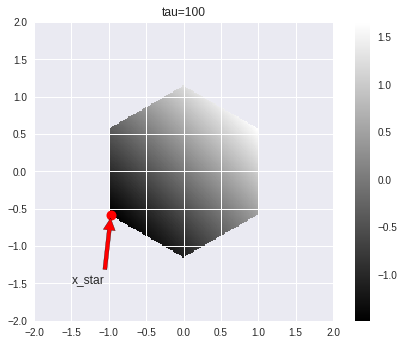

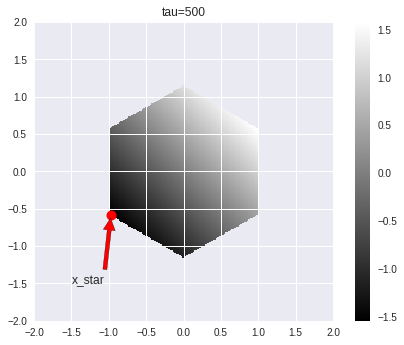

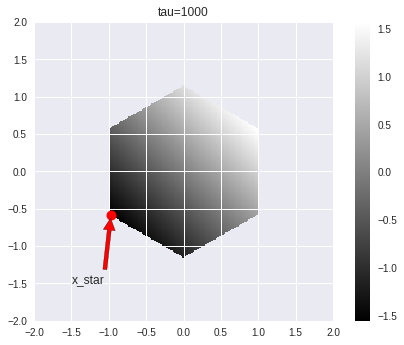

In [6]:
c = np.array([1,1], ndmin=2)
am = np.array([[np.cos(m*np.pi/3), np.sin(m*np.pi/3)] for m in range(1,7)])
l,h = -2,2
num_points = 250
x = y = np.linspace(l,h, num_points) 
xv, yv = np.meshgrid(x, y, indexing='xy')
x_ = np.stack((xv,yv))
xam = np.tensordot(am, x_, axes=[1,0])
m = lambda tau: 1/tau*np.log(1-xam)
for tau in [1,10,100,500,1000]:
    _m = m(tau)
    _m[np.isnan(_m)] = -np.inf
    _m = _m.sum(0)
    z_ = x_.sum(0) - _m
    z = z_.reshape(num_points,num_points)
    zam = z_.argmin()
    xm, ym = zam%num_points, zam//num_points
    plt.imshow(z, extent=[l,h,l,h], origin='lower', cmap='gray')
    plt.colorbar()
    plt.plot(x[xm],y[ym], marker='o', markersize=10, color="red")
    plt.annotate('x_star', xy=(x[xm],y[ym]), xytext=(-1.5, -1.5),
                arrowprops=dict(facecolor='red', shrink=0.05))
    plt.title('tau={}'.format(tau))
    plt.show()


## 4 d.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


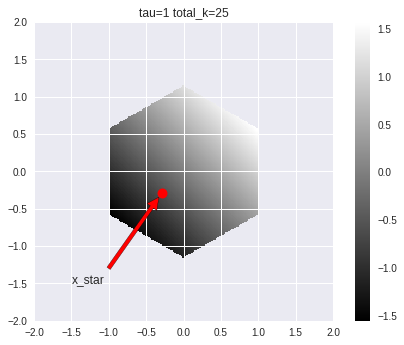

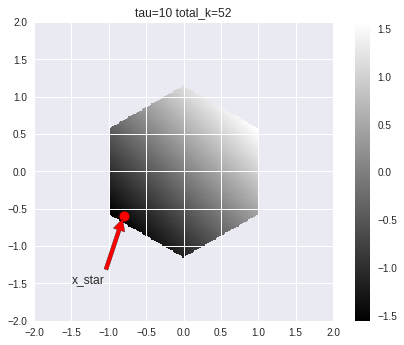

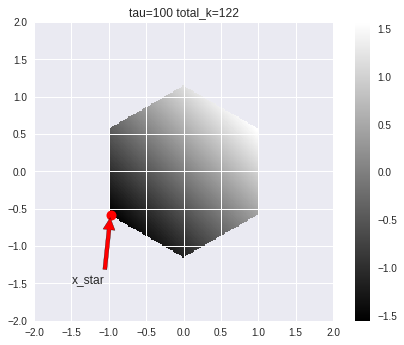

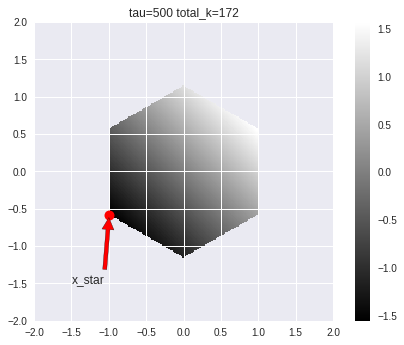

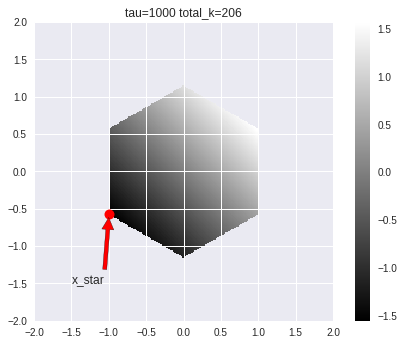

In [4]:
c = np.array([1,1], ndmin=2)
am = [np.array([np.cos(m*np.pi/3), np.sin(m*np.pi/3)],ndmin=2) for m in range(1,7)]
x0 = np.array([0.,0.],ndmin=2).T
k = 0
    
for tau in [1,10,100,500,1000]:
    f = lambda x: c@x - 1/tau*np.sum([np.log(np.max(1-_am@x,0)) for _am in am])
    grad_f = lambda x: c - 1/tau*np.sum([-_am/(1-_am@x) for _am in am],0)
    gd = GradientDescent(f, grad_f)
    x = gd.solve(x0,10000, 1e-4)
    x0 = x.copy()
    k += gd.k
    plt.imshow(z, extent=[l,h,l,h], origin='lower', cmap='gray')
    plt.colorbar()
    plt.plot(x[0],x[1], marker='o', markersize=10, color="red")
    plt.annotate('x_star', xy=(x[0],x[1]), xytext=(-1.5, -1.5),
                arrowprops=dict(facecolor='red', shrink=0.05))
    plt.title('tau={} total_k={}'.format(tau, k))
    plt.show()